In [67]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import AffineTransform, warp

In [68]:
def big_im():
    plt.gcf().set_size_inches(16, 16)

In [69]:
filename = '2018_08_15_Naklon-Right_g201b20265_f004_0699'
JPG = '.JPG'
img = cv2.imread(filename + JPG)
markers = cv2.imread(filename + '_fg' + JPG, 0)
markers_bg = cv2.imread(filename + '_bg' + JPG, 0)

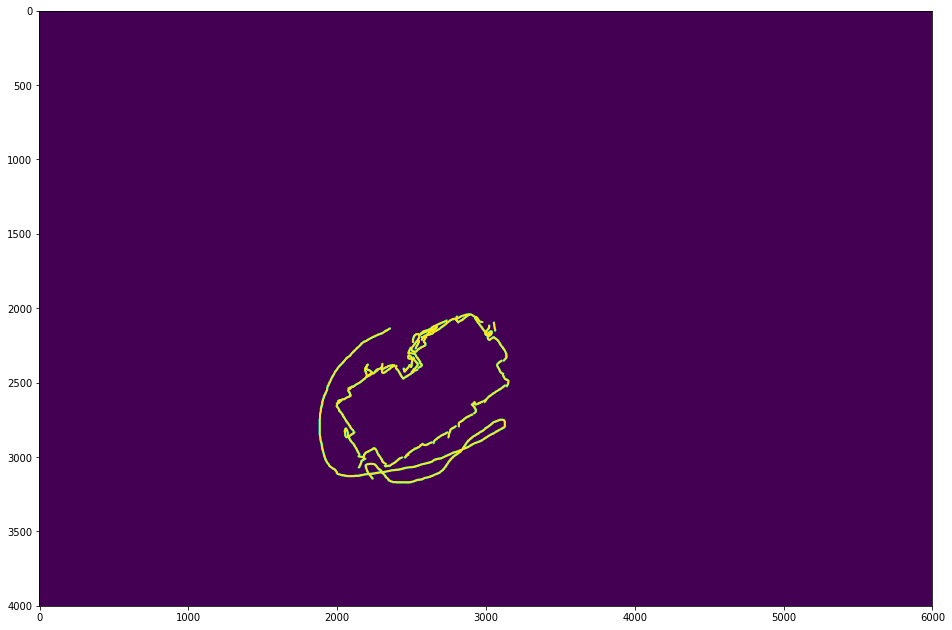

In [70]:
big_im()
plt.imshow(markers_bg)

dtype('uint8')

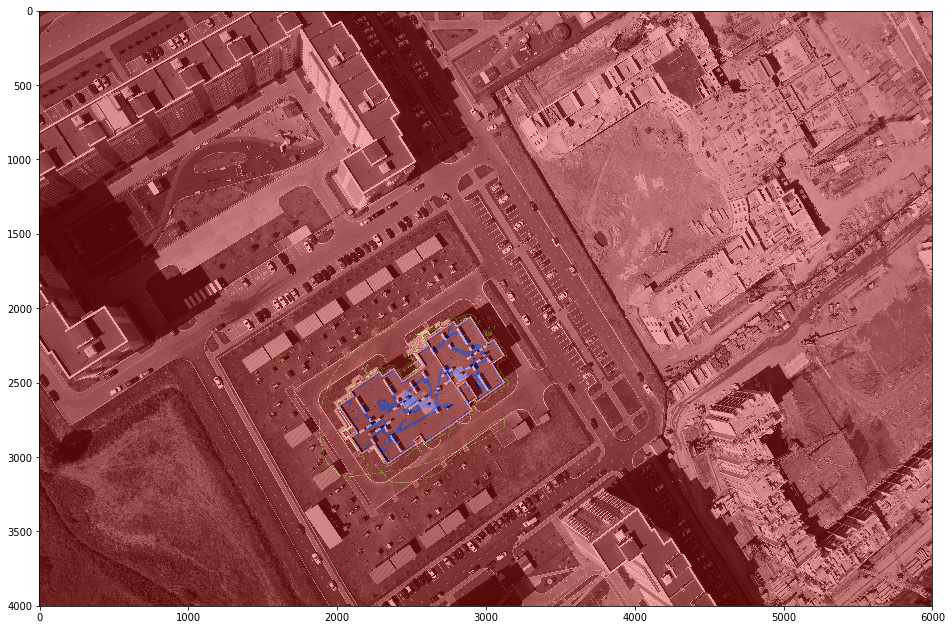

In [71]:
from skimage.color import label2rgb

labels = np.zeros_like(markers, dtype=np.int32)
labels[markers == 255] = 1
labels[markers_bg == 255] = 2
big_im()
plt.imshow(label2rgb(labels, image=img[..., ::-1]))

np.unique(labels)

img.dtype

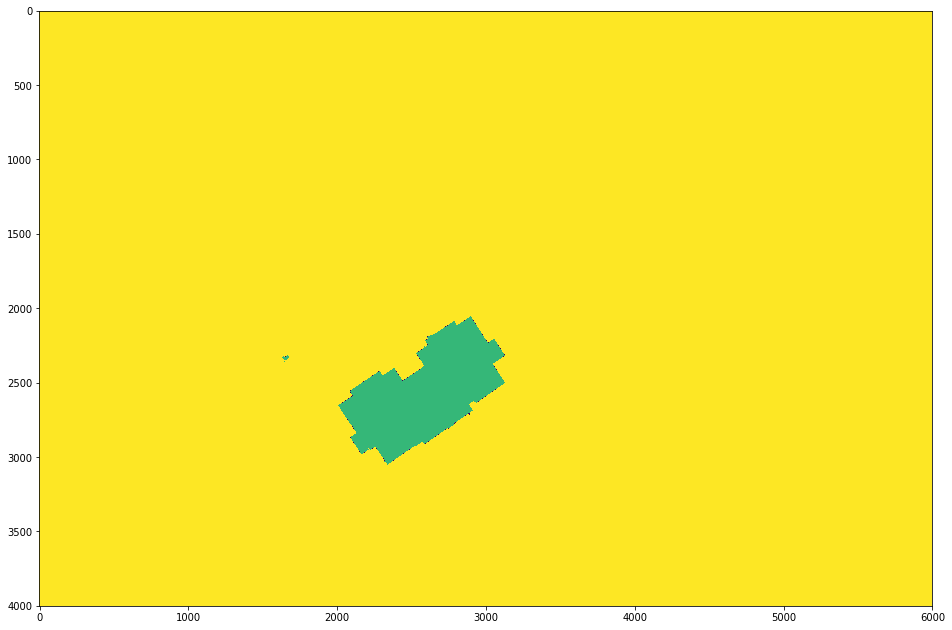

In [72]:
out = cv2.watershed(img, labels)
big_im()
plt.imshow(out)

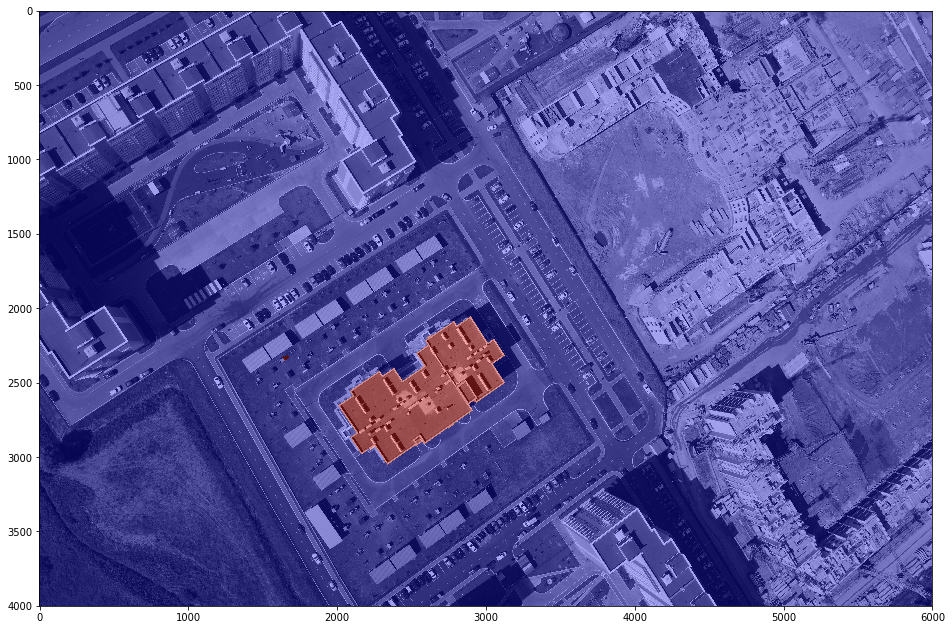

In [73]:
big_im()
plt.imshow(label2rgb(out, image=img))

In [74]:
contour = np.zeros_like(out)
contour[out == -1] = 255

True

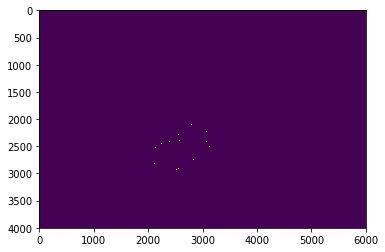

In [75]:
plt.imshow(contour)
cv2.imwrite(filename + '_contour' + JPG, contour)